# Homework 2: Discovery of Frequent Itemsets and Association Rules
Authors: Tori Leatherman & Eva Engel \
Date: 21th November 2022

# Task
The task can be divided into two sub-problem: 
1. (A-Priori Algorithm) Find frequent itemsets with support at least *s_threshold*.
1. Generate association rules with confidence at least *c_threshold* from the itemsets found in the first step.

Our code reproduces the algorithm that was introduced by R. Agrawal and R. Srikant in [Fast Algorithms for Mining Association Rules](https://www.vldb.org/conf/1994/P487.PDF).


## Set up 
1. *pip install -r /path/to/requirements.txt*


### Import

In [20]:
from itertools import combinations
import matplotlib.pyplot as plt

from apriori import Apriori
from association_rule_finder import AssociationRuleFinder
from dataset_reader import read_transactions

### Data Set

In [15]:
dataset_file = 'T10I4D100K.dat'
transactions = read_transactions(dataset_file)
print(f"Data set contains {len(transactions)} transactions and {len(set.union(*transactions))} unique items.")

Data set is load.
Data set contains 100000 transactions and 870 unique items.


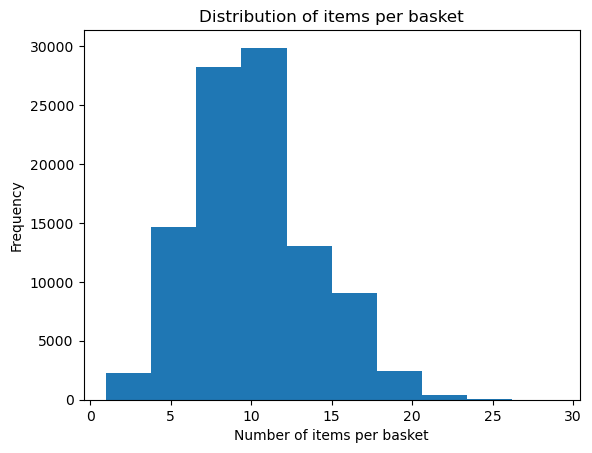

In [16]:
# Distribution of items per basket

nof_items= [len(transaction) for transaction in transactions]
plt.hist(nof_items)
plt.title('Distribution of items per basket')
plt.xlabel('Number of items per basket')
plt.ylabel('Frequency')
plt.show()

# Frequent items (A-Priori Algorithm)

TODO

input: transactions 
s_threshold

In [4]:
finder = Apriori(transactions, s_threshold=0.95)
k_frequent_items = finder.apriori()

1st Pass: Frequent items = 44
2th Pass: Candidates = 946
The average support is 206.67
Frequent items = 48
 -------------------------------------
3th Pass: Candidates = 109
The average support is 78.81
Frequent items = 6
 -------------------------------------
4th Pass: Candidates = 1
The average support is 32.00
Frequent items = 0
 -------------------------------------


### Get most frequent item sets with largest number of items

In [5]:
max_k = len(list(k_frequent_items.keys())[-1])

In [26]:
max_k_itemset = {k: v for k,v in k_frequent_items.items() if len(k) == max_k}
max_k_itemset

{frozenset({120, 862, 895}): 571,
 frozenset({217, 346, 888}): 438,
 frozenset({39, 145, 419}): 352,
 frozenset({368, 494, 682}): 591,
 frozenset({39, 368, 470}): 332,
 frozenset({217, 283, 346}): 827}

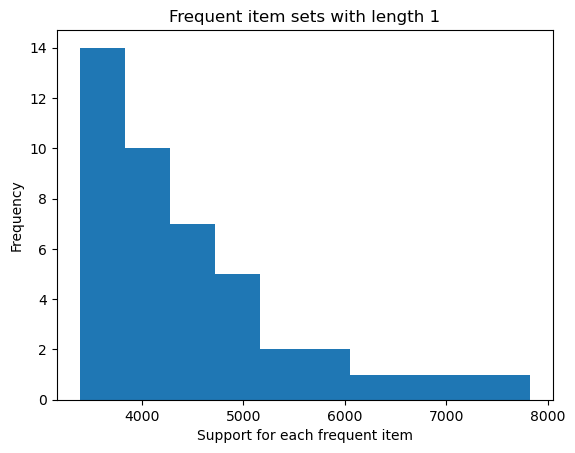

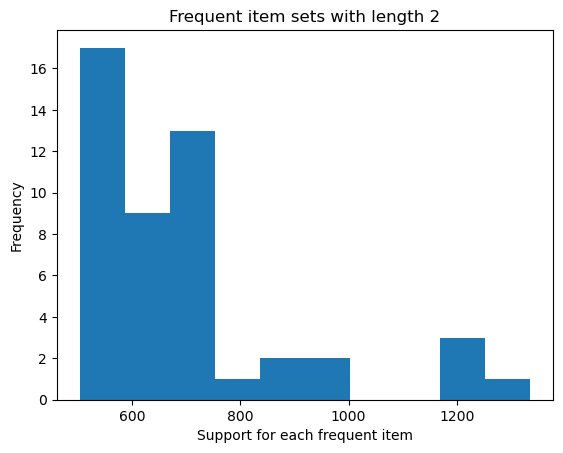

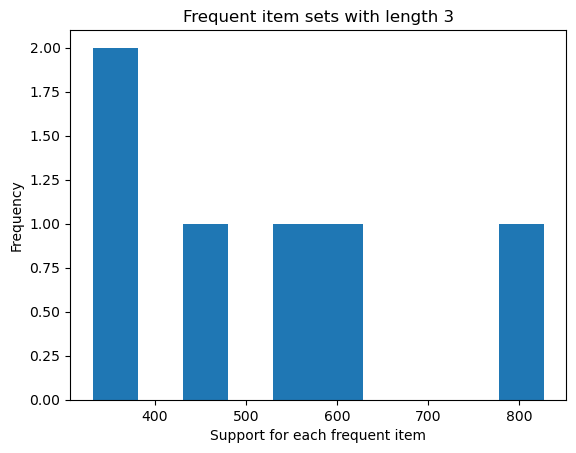

In [7]:
for k in range(1,max_k+1):

    supports = [val for key,val in k_frequent_items.items() if len(key) == k]
    plt.hist(supports)
    plt.xlabel('Support for each frequent item')
    plt.ylabel('Frequency')
    plt.title(f'Frequent item sets with length {k}')
    plt.show()

# Association rules

Confidence of a rule  X -> Y

In [8]:
rule_finder = AssociationRuleFinder()
rules = rule_finder.find_rules(k_frequent_items)

In [14]:
sorted(((v,k) for k,v in rules.items()), reverse=True)

[(0.9087912087912088, (frozenset({283, 346}), frozenset({217}))),
 (0.8992125984251969, (frozenset({862, 895}), frozenset({120}))),
 (0.8930885529157667, (frozenset({217, 283}), frozenset({346}))),
 (0.8586466165413534, (frozenset({120, 862}), frozenset({895}))),
 (0.8335766423357664, (frozenset({120, 895}), frozenset({862}))),
 (0.8277310924369747, (frozenset({494, 682}), frozenset({368}))),
 (0.8126159554730983, (frozenset({217, 888}), frozenset({346}))),
 (0.6888454011741683, (frozenset({39, 419}), frozenset({145}))),
 (0.6872093023255814, (frozenset({368, 494}), frozenset({682}))),
 (0.6357039187227866, (frozenset({346, 888}), frozenset({217}))),
 (0.6190119760479041, (frozenset({217, 346}), frozenset({283}))),
 (0.5876106194690266, (frozenset({39, 368}), frozenset({470}))),
 (0.5714285714285714, (frozenset({368, 470}), frozenset({39}))),
 (0.5578446909667195, (frozenset({145, 419}), frozenset({39})))]

# Experiments

## Monotonicity of support
The following shows that the support of a set is at least as large as the support of its subsets. We take the largest and most frequent item set and show that its subsets have a greater support. 

In [19]:
max_k_support= max(max_k_itemset, key=lambda k: max_k_itemset[k])
print(max_k_support, max_k_itemset[max_k_support])


frozenset({217, 346, 283}) 827


In [25]:
for k_length in range(1, len(max_k_support)):
    for subset in [frozenset(combination) for combination in combinations(max_k_support, k_length)]:
        print(subset, k_frequent_items.get(subset))
    print('----------------------------------')
print(max_k_support, max_k_itemset[max_k_support])

frozenset({217}) 5375
frozenset({346}) 3470
frozenset({283}) 4082
----------------------------------
frozenset({217, 346}) 1336
frozenset({217, 283}) 926
frozenset({346, 283}) 910
----------------------------------
frozenset({217, 346, 283}) 827
